# TP Challenge

Replace your_name  by your name 

## Your task

Today you are a datascientist for a marketing saas company.
You have some data about your customer, a file with some features and the target **buy**.

The target variable is whether a customer will click 'Buy' on a website. Buy = 0 and Buy = 1 indicate 'no' and 'yes' respectively. Independent variables capture customer background and customer website navigation behavior information. First variable in the train.csv data file identifies each customer uniquely.

**The challenge is to correctly predict if a customer will click 'buy' on a website.**

## Importing Librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score

## Preprocessing

- Check if missing values

- Check if duplicates ( if yes delete duplicated rows)

In [2]:
url = "./data/train.csv"
data = pd.read_csv(url)
data.drop(columns='Id', inplace=True)

duplicate_count = data.duplicated().sum()
duplicate_count
data.drop_duplicates(inplace=True)

## Visualization 

- Check if you have outliers in each features (columns) using seaborn or matplotlib
- Check the correlation between each columns ( seaborn can maybe help you.. )[https://seaborn.pydata.org/generated/seaborn.pairplot.html]

- Plot the distribution of the target


In [ ]:
# Step 1
X = data.drop(columns='Buy')
sns.catplot(y='value', col='variable', col_wrap=5, data=X.melt(), kind='box')
plt.show()

In [ ]:
# Step 2
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= 'bwr') 
plt.show()

In [ ]:
# Step 3
data[['Buy']].plot.hist()
plt.show()

## Undersample your data

- Undersample the target with ( you may have to pip install -U imbalanced-learn)

from imblearn.over_sampling import RandomOverSampler, SMOTE

Ou 

from imblearn.under_sampling import RandomUnderSampler

In [6]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

y = data['Buy']
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 244, 1: 244})


## Building models 

- Build a dummy model to have a baseline score

- Build a better model to classify your data and beat your baseline model

- Check the :
    - accuracy,
    - Recall,
    - Precision,
    - f1 score

- Plot your learning curve

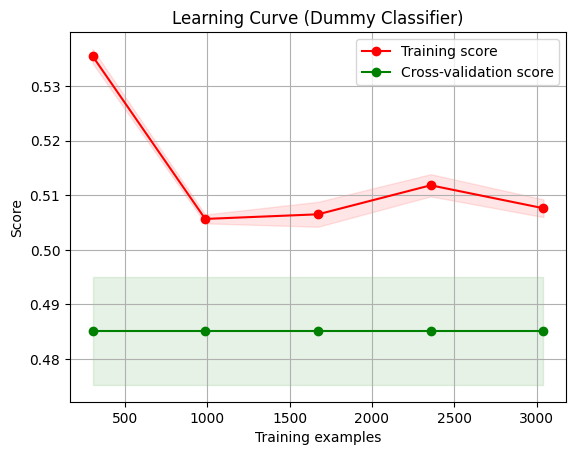

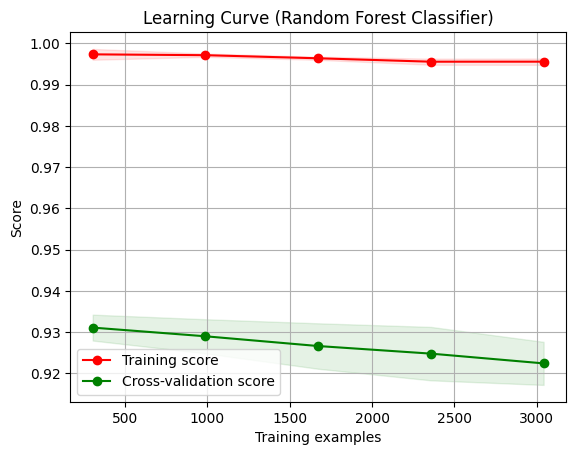

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.dummy import DummyClassifier
import numpy as np

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Dummy Model
dummy_model = DummyClassifier(strategy="uniform", random_state=42)
dummy_model.fit(X_train, y_train)
dummy_predictions = dummy_model.predict(X_test)

# Build a Better Model (Random Forest)
better_model = RandomForestClassifier(random_state=42)
better_model.fit(X_train, y_train)
better_predictions = better_model.predict(X_test)


# Plot Learning Curve
def plot_learning_curve(estimator, title, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# Plot learning curves
plot_learning_curve(dummy_model, "Learning Curve (Dummy Classifier)", X, y)
plot_learning_curve(better_model, "Learning Curve (Random Forest Classifier)", X, y)

**⚠️(OPTIONAL)⚠️**
- Try to improve your first model by using a robust scaler or StandardScaler

- Try to use another  classifier model to improve your model performance

- Check the :
    - accuracy,
    - Recall,
    - Precision,
    - f1 score

- Plot your learning curve

SVM Model Performance:
Accuracy: 0.9329829172141918
Recall: 0.0
Precision: 0.0
F1 Score: 0.0


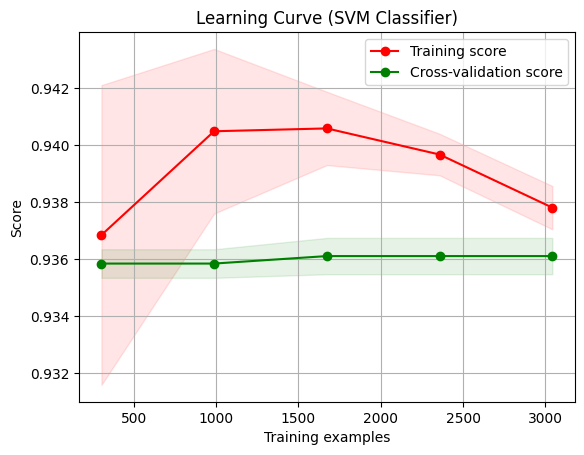

In [8]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.svm import SVC

# Preprocess the data using RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build a Better Model (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)

# Print performance metrics
print("SVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Recall:", recall_score(y_test, svm_predictions))
print("Precision:", precision_score(y_test, svm_predictions, zero_division=0))
print("F1 Score:", f1_score(y_test, svm_predictions))

# Plot learning curve for SVM
plot_learning_curve(svm_model, "Learning Curve (SVM Classifier)", X_scaled, y)

# Finish ?

add your code to a repos and send me the link by mail in the format :

the subject of the email will be **YOUR NAME | ML-IIM-challenge**

Send it to magloire.ndabagera@gmail.com at 5pm max.